# Exploring Student Data (Student Performance)

#### Overview

Imagine that you work for a school district and have collected some data on local students and their parents. You’ve been tasked with answering some important questions:

- How are students performing in their math classes?
- What do students’ parents do for work?
- How often are students absent from school?
- In this project, you’ll explore and summarize some student data in order to answer these questions.

##### Data citation:

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [link](http://archive.ics.uci.edu/ml). \
Irvine, CA: University of California, School of Information and Computer Science [link](http://archive.ics.uci.edu/ml/datasets/Student+Performance) \
Paulo Cortez, University of Minho, Guimarães, Portugal [link](http://www3.dsi.uminho.pt/pcortez).

## Initial Inspection

1. First, familiarize yourself with the dataset

Expected data type for each column:
##### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
- `school`: student's school (binary: "GP"` - Gabriel Pereira or "MS" - Mousinho da Silveira)
- `sex`: student's sex (binary: "F"` - female or "M" - male)
- `age`: student's age (numeric: from 15 to 22)
- `address`: student's home address type (binary: "U"` - urban or "R" - rural)
- `famsize`: family size (binary: "LE3" - less or equal to 3 or "GT3"` - greater than 3)
- `Pstatus`: parent's cohabitation status (binary: "T"` - living together or "A" - apart)
- `Medu`: mother's education (numeric: 0 - none,  1` - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- `Fedu`: father's education (numeric: 0 - none,  1` - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- `Mjob`: mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
- `Fjob`: father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
- `reason`: reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
- `guardian`: student's guardian (nominal: "mother", "father" or "other")
- `traveltime`: home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4` - >1 hour)
- `studytime`: weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4` - >10 hours)
- `failures`: number of past class failures (numeric: n if 1<=n<3, else 4)
- `schoolsup`: extra educational support (binary: yes or no)
- `famsup`: family educational support (binary: yes or no)
- `paid`: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- `activities`: extra-curricular activities (binary: yes or no)
- `nursery`: attended nursery school (binary: yes or no)
- `higher`: wants to take higher education (binary: yes or no)
- `internet`: Internet access at home (binary: yes or no)
- `romantic`: with a romantic relationship (binary: yes or no)
- `famrel`: quality of family relationships (numeric: from 1 - very bad to 5` - excellent)
- `freetime`: free time after school (numeric: from 1 - very low to 5` - very high)
- `goout`: going out with friends (numeric: from 1 - very low to 5` - very high)
- `Dalc`: workday alcohol consumption (numeric: from 1 - very low to 5` - very high)
- `Walc`: weekend alcohol consumption (numeric: from 1 - very low to 5` - very high)
- `health`: current health status (numeric: from 1 - very bad to 5` - very good)
- `absences`: number of school absences (numeric: from 0 to 93)

##### these grades are related with the course subject, Math or Portuguese:
- `G1`: first period grade (numeric: from 0 to 20)
- `G2`: second period grade (numeric: from 0 to 20)
- `G3`: final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets . 
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.


2. Next, let's load in the diabetes data to start exploring.
   
   **Note**: The data is stored in a file called `student-mat.csv`.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
student = pd.read_csv('student-mat.csv',sep=';')
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
student.shape

(395, 33)

In [6]:
student[student.isnull().any(axis=1)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


Our analysis will be limited to the variables __address, absences, Mjob, Fjob, and G3__.

In [7]:
student = student[['address', 'absences', 'Mjob', 'Fjob', 'G3']]
student = student.rename(columns={'G3': 'math_grade'})
student.head()

,address,absences,Mjob,Fjob,math_grade
0,U,6,at_home,teacher,6
1,U,4,at_home,other,6
2,U,10,at_home,other,10
3,U,2,health,services,15
4,U,4,other,other,10


3. Use the pandas `.describe()` method to print out summary statistics for all five features in the dataset. Inspect the output. Do more students live in urban or rural locations?

In [8]:
student.describe(include='all')

,address,absences,Mjob,Fjob,math_grade
count,395,395.000000,395,395,395.000000
unique,2,NaN,5,5,NaN
top,U,NaN,other,other,NaN
freq,307,NaN,141,217,NaN
mean,NaN,5.708861,NaN,NaN,10.415190
std,NaN,8.003096,NaN,NaN,4.581443
min,NaN,0.000000,NaN,NaN,0.000000
25%,NaN,0.000000,NaN,NaN,8.000000
50%,NaN,4.000000,NaN,NaN,11.000000
75%,NaN,8.000000,NaN,NaN,14.000000


4. Let’s start by trying to summarize the `math_grade` column. Calculate and print the mean, median and mode value of `math_grade`.
    
    How does the median value compare to the mean value? Is it lower or higher?\
    What is the most common grade earned by students in this dataset? How different is this number from the mean and median?


In [9]:
print(f'Value mean:', student.math_grade.mean())
print(f'Value median:', student.math_grade.median())
print(f'Value mode:', student.math_grade.mode()[0])

Value mean: 10.415189873417722
Value median: 11.0
Value mode: 10


5. Let’s summarize the spread of student grades. Calculate and print the range of the `math_grade` column

In [10]:
print(f'Minimum note value:', min(student.math_grade))
print(f'Maximum note value:', max(student.math_grade))

Minimum note value: 0
Maximum note value: 20


6. Calculate and print the standard deviation of the math_grade column. About two thirds of values fall within one standard deviation of the mean. What does this number tell you about how much math grades vary?

In [11]:
print(f'Standard deviation value:', student.math_grade.std())

Standard deviation value: 4.5814426109978434


7. Finally, calculate the mean absolute deviation of the math_grade column. This is the mean difference between each students’s score and the average score.

In [17]:
from scipy.stats import median_absolute_deviation
mad_value = median_absolute_deviation(student['math_grade'])
print(f'Mean absolute deviation value:', mad_value)

ImportError: cannot import name 'median_absolute_deviation' from 'scipy.stats' (C:\Users\maylon\AppData\Roaming\Python\Python311\site-packages\scipy\stats\__init__.py)

##### Visualize the distribution of student grades

8. Now that we’ve summarized student grades using statistics for central tendency and spread, let’s visualize the distribution using a histogram. Use the seaborn ``histplot()`` function to create a histogram of ``math_grade``.

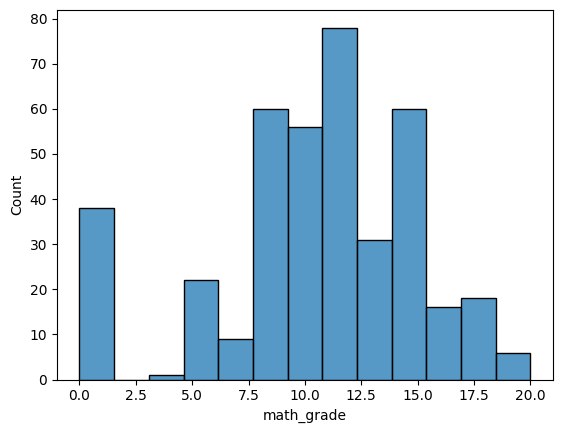

In [22]:
sns.histplot(x='math_grade', data=student)
plt.show()

9. Another way to visualize the distribution of a quantitative variable is using a box plot. Use the seaborn ``boxplot()`` function to create a boxplot of ``math_grade``.

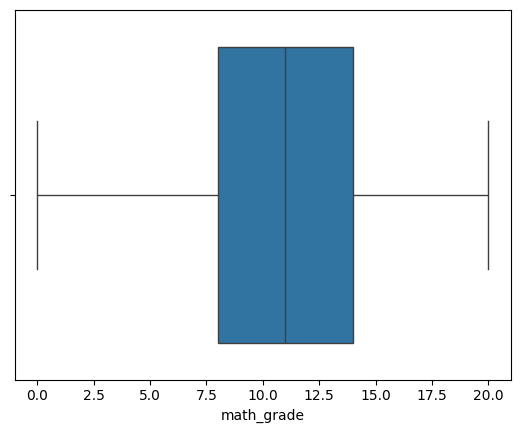

In [23]:
sns.boxplot(x='math_grade', data=student)
plt.show()

10. The ``Mjob`` column in the dataset contains information about what the students mothers do as a profession. Summarize the ``Mjob`` column by printing the number of students who have mothers with each job type.

    Which value of ``Mjob`` is most common?

In [29]:
print(pd.DataFrame({'Counts': student.Mjob.value_counts()}))

          Counts
Mjob            
other        141
services     103
at_home       59
teacher       58
health        34


11. Now, calculate and print the __proportion__ of students who have mothers with each job type. What proportion of students have mothers who work in health?

In [30]:
print(pd.DataFrame({'Counts': student.Mjob.value_counts(), 'Percentages (%)': round(student.Mjob.value_counts(normalize=True)*100,2)}))

          Counts  Percentages (%)
Mjob                             
other        141            35.70
services     103            26.08
at_home       59            14.94
teacher       58            14.68
health        34             8.61


12. Now that we’ve used summary statistics to understand the relative frequencies of different mothers’ jobs, let’s visualize the same information with a bar chart. Use the seaborn ``countplot()`` function to create a bar chart of the ``Mjob`` variable.

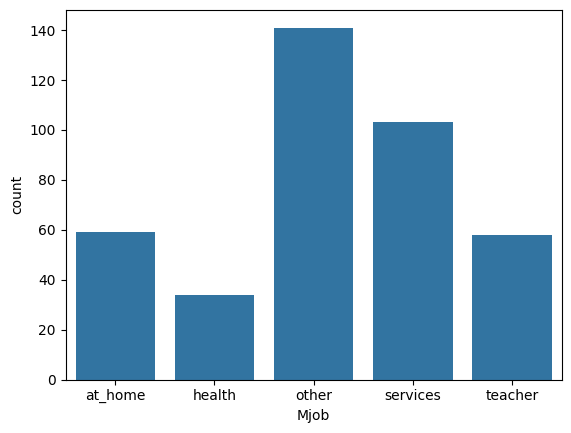

In [31]:
sns.countplot(x='Mjob', data=student, )
plt.show()

13. We can also visualize the same information using a pie chart. Create a pie chart of the ``Mjob`` column.

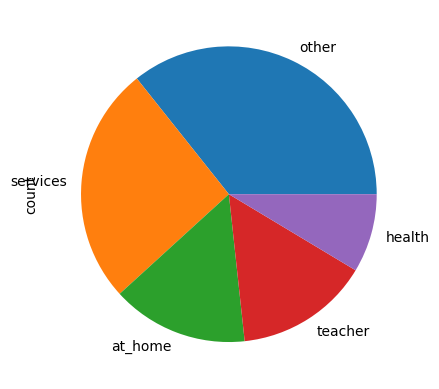

In [33]:
student.Mjob.value_counts().plot.pie()
plt.show()

14. Congratulations! You’ve begun to explore a dataset by calculating summary statistics and creating some basic data visualizations. There are still a few more columns in this dataset that we haven’t looked at carefully:

- address: the location of the student’s home ('U' for urban and 'R' for rural)
- absences: the number of times the student was absent during the school year
- Fjob: the student’s father’s job industry

Now that we’ve walked you through an exploration of ``math_grade`` and ``Mjob`` in more detail, take some time to explore the rest of the columns in the dataset! Which kinds of summary statistics and visualizations can you use to summarize these columns?

In [34]:
print(pd.DataFrame({'Counts': student.address.value_counts(), 'Percentages (%)': round(student.address.value_counts(normalize=True)*100,2)})) 

         Counts  Percentages (%)
address                         
U           307            77.72
R            88            22.28


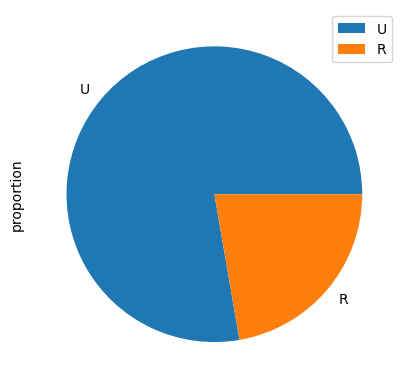

In [39]:
student.address.value_counts(normalize=True).plot.pie()
plt.legend()
plt.show()

In [42]:
print(f'Value mean:', student.absences.mean())
print(f'Value median:', student.absences.median())
print(f'Value mode:', student.absences.mode()[0])
print(f'Minimum note value:', min(student.absences))
print(f'Maximum note value:', max(student.absences))
print(f'Standard deviation value:', student.absences.std())

Value mean: 5.708860759493671
Value median: 4.0
Value mode: 0
Minimum note value: 0
Maximum note value: 75
Standard deviation value: 8.00309568710818


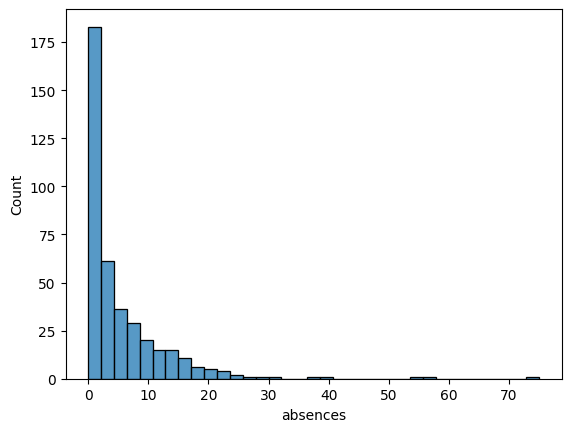

In [43]:
sns.histplot(x='absences', data=student)
plt.show()